In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
X = df.drop("target", axis=1)
y = df["target"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9853658536585366


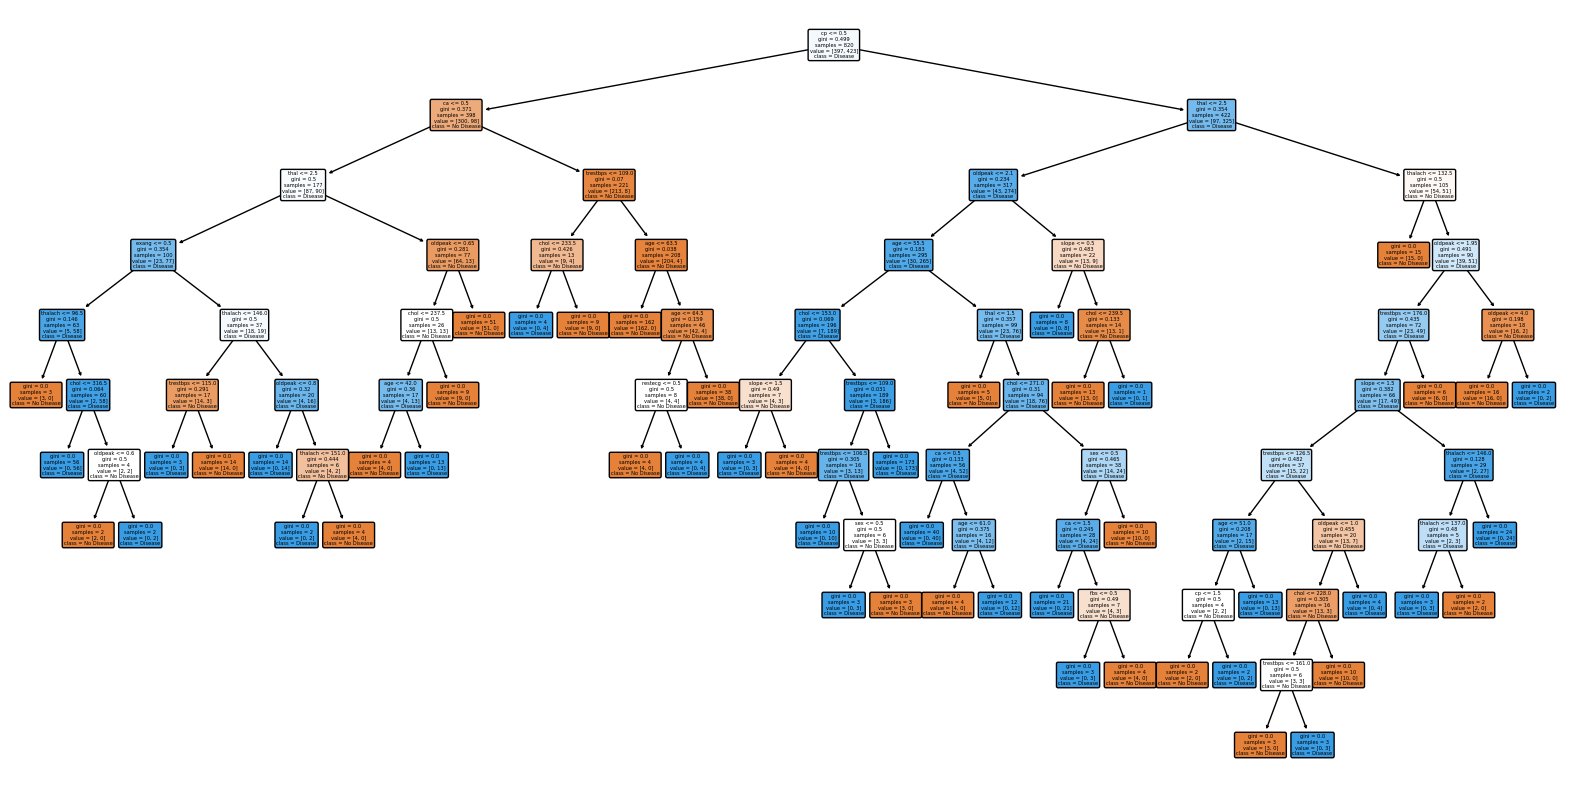

In [8]:
feature_names = list(X.columns)

from sklearn import tree
import matplotlib.pyplot as plt

feature_names = list(X.columns)

plt.figure(figsize=(20,10))
tree.plot_tree(
    model,
    feature_names=feature_names,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)
plt.show()


Checking for overfitting

In [9]:
from sklearn.metrics import accuracy_score

# Predict on train and test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))


Train accuracy: 1.0
Test accuracy: 0.9853658536585366


Trying different depths

In [10]:
for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Depth={depth} | Train accuracy={train_acc:.3f} | Test accuracy={test_acc:.3f}")


Depth=1 | Train accuracy=0.762 | Test accuracy=0.751
Depth=2 | Train accuracy=0.770 | Test accuracy=0.678
Depth=3 | Train accuracy=0.851 | Test accuracy=0.780
Depth=4 | Train accuracy=0.883 | Test accuracy=0.800
Depth=5 | Train accuracy=0.929 | Test accuracy=0.844
Depth=6 | Train accuracy=0.949 | Test accuracy=0.883
Depth=7 | Train accuracy=0.973 | Test accuracy=0.917
Depth=8 | Train accuracy=0.990 | Test accuracy=0.976
Depth=9 | Train accuracy=0.996 | Test accuracy=0.980


Changing depth to 8

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)

train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Train accuracy: 0.9902439024390244
Test accuracy: 0.975609756097561


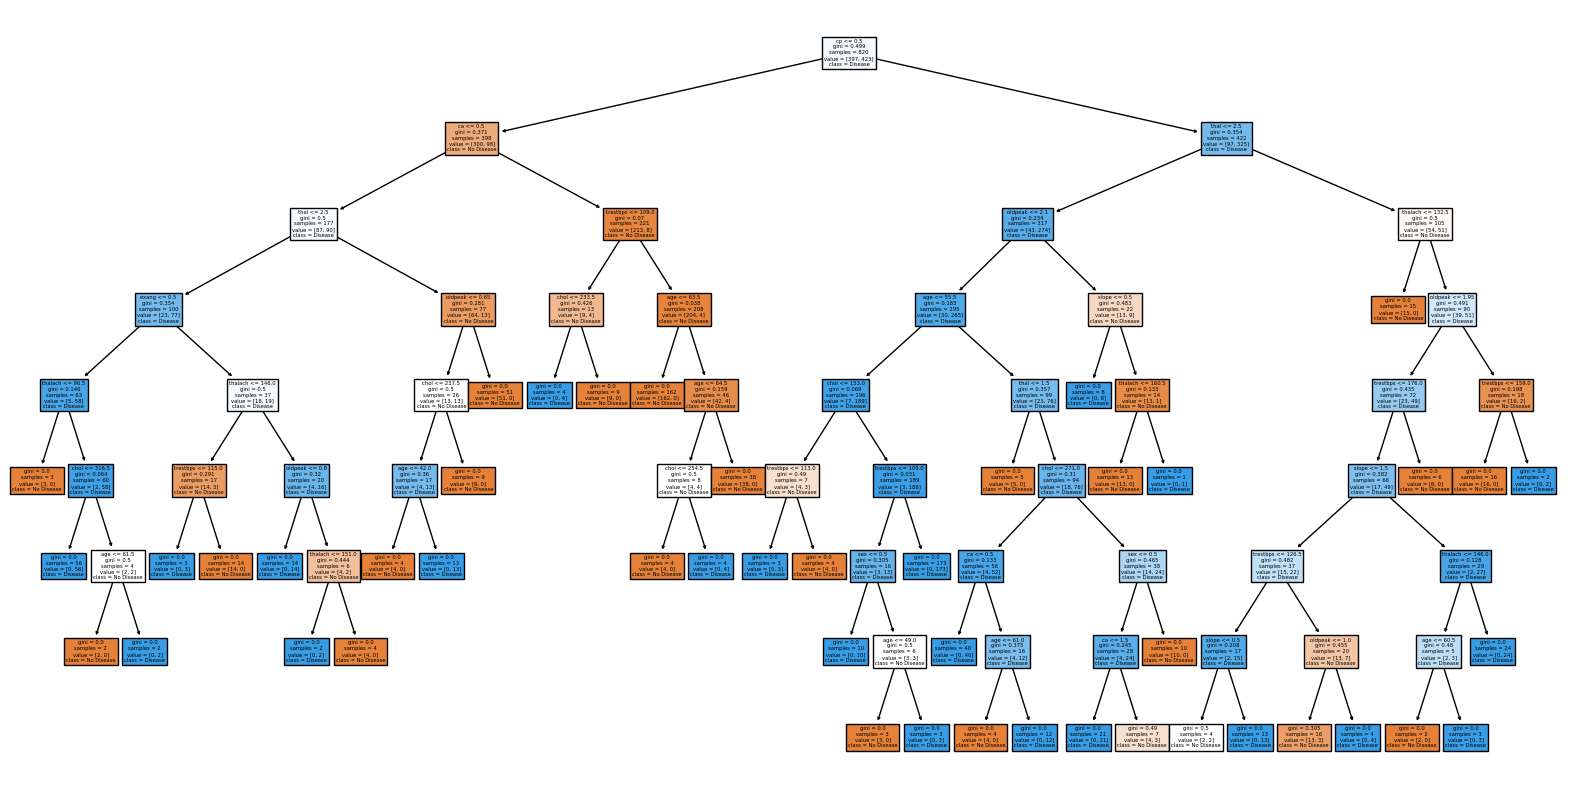

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=feature_names, class_names=["No Disease", "Disease"])
plt.show()


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=8, random_state=42, n_estimators=100)

rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Train Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_acc_rf:.4f}")


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9854


Comparing accuracy

In [14]:
print(f"Random Forest Train Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest Test Accuracy: {test_acc_rf:.4f}\n")

print(f"Decision Tree Train accuracy: {train_acc:.4f}")
print(f"Decision Tree Test accuracy: {test_acc:.4f}")


Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.9854

Decision Tree Train accuracy: 0.9902
Decision Tree Test accuracy: 0.9756


Interpreting feature importances

In [15]:
import pandas as pd
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
2         cp    0.281608
12      thal    0.150938
11        ca    0.121969
9    oldpeak    0.089428
0        age    0.071250
7    thalach    0.066594
4       chol    0.066238
3   trestbps    0.065775
10     slope    0.035035
1        sex    0.031812
8      exang    0.019353
5        fbs    0.000000
6    restecg    0.000000


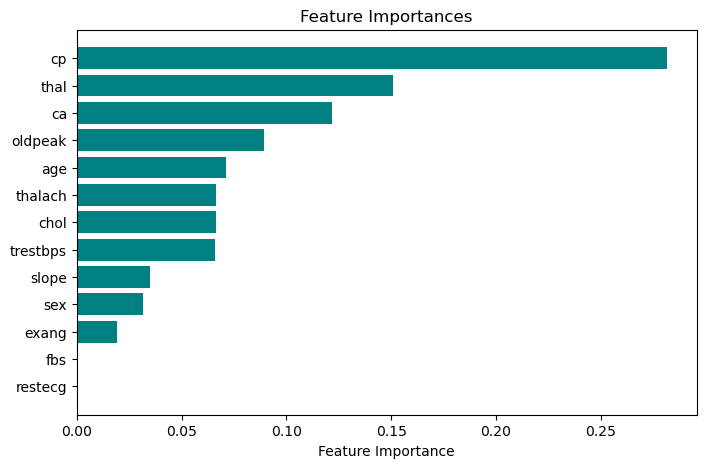

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance'],
    color='teal'
)
plt.xlabel("Feature Importance")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()

Cross validation on Decision Tree (5 fold)

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", np.mean(scores))

Cross-validation scores: [0.99512195 0.98536585 0.97073171 0.9804878  0.9902439 ]
Mean cross-validation accuracy: 0.984390243902439


Cross Validation on RandomForest (5 fold)

In [18]:
scores_rf = cross_val_score(rf, X, y, cv=5)

print("Random Forest CV scores:", scores_rf)
print("Random Forest mean CV accuracy:", np.mean(scores_rf))

Random Forest CV scores: [1.         1.         0.98536585 1.         0.97560976]
Random Forest mean CV accuracy: 0.9921951219512195


In [19]:
df.to_csv("heart_dataset.csv", index=False)